In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

In [66]:
R_etac = 20e+3
Vr = 150
Tr = 25e-6
Kr = 0.25e+12
f0 = 5.3e+09
delta_fdop = 80
Fr = 7.5e+6
Fa = 104
N_az = 256
N_rg = 256
theta_sqc = np.array([0,22.8])*np.pi/180
eta_c = np.array([0,-51.7])
f_etac = np.array([0,2055])

In [67]:
theta_rc = np.arcsin(-eta_c*Vr/R_etac)

#total time of range
T_rg = N_rg/Fr
#total time of azimuth
T_az = N_az/Fa
print('Trg:',T_rg,'Taz:',T_az)

La = 0.886*2*Vr*np.cos(theta_rc[1])


eta = np.linspace(-T_az/2,T_az/2 - T_az/N_az,N_az)
tau = np.linspace(-T_rg/2,T_rg/2 - T_rg/N_rg,N_rg) 
eta = eta.reshape(N_az,1)
tau = tau.reshape(1,N_rg)

Trg: 3.4133333333333334e-05 Taz: 2.4615384615384617


(256, 256)


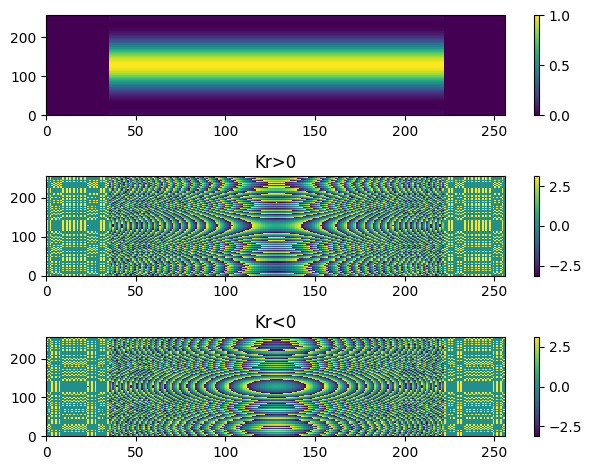

In [68]:
eta_1 = eta + eta_c[0]
R_eta1 = np.sqrt(R_etac**2 + (Vr*eta_1)**2)  
rectan1 = (np.abs(tau-2*(R_eta1-R_etac)/sc.c)<=Tr/2)

S_2d_p = rectan1*np.sinc(eta_1-eta_c[0])**2*np.exp(-1j*4*np.pi*R_eta1*f0/sc.c)\
        *np.exp(1j*np.pi*Kr*(tau-2*(R_eta1-R_etac)/sc.c)**2)
S_2d_n = rectan1*np.sinc(eta_1-eta_c[0])**2*np.exp(-1j*4*np.pi*R_eta1*f0/sc.c)\
        *np.exp(1j*np.pi*(-Kr)*(tau-2*(R_eta1-R_etac)/sc.c)**2)

print(S_2d_p.shape)

plt.figure()
plt.subplot(3,1,1)
plt.pcolormesh(np.abs(S_2d_p))
plt.colorbar()

plt.subplot(3,1,2)
plt.pcolormesh(np.angle(S_2d_p))
plt.title('Kr>0')
plt.colorbar()

plt.subplot(3,1,3)
plt.pcolormesh(np.angle(S_2d_n))
plt.title('Kr<0')
plt.colorbar()

plt.tight_layout()
plt.show()


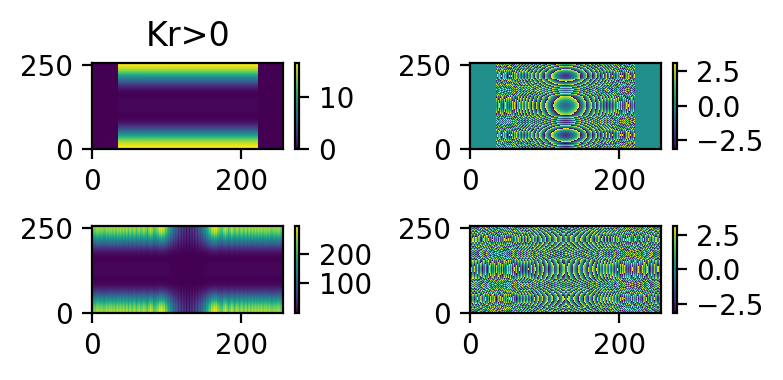

In [69]:
plt.figure(dpi=200,figsize=(4,2))
plt.subplot(2,2,1)
S_2d_p_rf = sf.fft(S_2d_p,axis=0) 
plt.pcolormesh(np.abs(S_2d_p_rf))
plt.title('Kr>0')
plt.colorbar()

plt.subplot(2,2,2)
plt.pcolormesh(np.angle(S_2d_p_rf))
plt.colorbar()

plt.subplot(2,2,3)
S_2df_p = sf.fft2(S_2d_p)
plt.pcolormesh(np.abs(S_2df_p))
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolormesh(np.angle(S_2df_p))
plt.colorbar()

plt.tight_layout()
plt.show()


(256, 256)


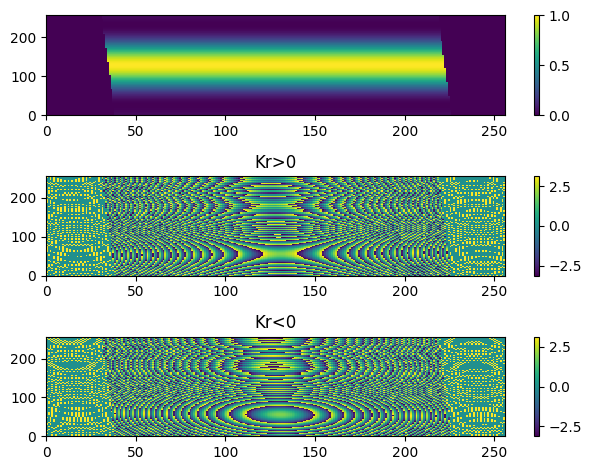

In [70]:
eta_2 = eta + eta_c[1]
R_eta2 = np.sqrt(R_etac**2 - (Vr*eta_c[1])**2 + (Vr*eta_2)**2)  
rectan2 = (np.abs(tau-2*(R_eta2-R_etac)/sc.c)<=Tr/2)

S_2d_p = rectan2*np.sinc(eta_2-eta_c[1])**2*np.exp(-1j*4*np.pi*R_eta2*f0/sc.c)\
        *np.exp(1j*np.pi*Kr*(tau-2*(R_eta2-R_etac)/sc.c)**2)
S_2d_n = rectan2*np.sinc(eta_1-eta_c[1])**2*np.exp(-1j*4*np.pi*R_eta2*f0/sc.c)\
        *np.exp(1j*np.pi*(-Kr)*(tau-2*(R_eta2-R_etac)/sc.c)**2)

print(S_2d_p.shape)

plt.figure()
plt.subplot(3,1,1)
plt.pcolormesh(np.abs(S_2d_p))
plt.colorbar()

plt.subplot(3,1,2)
plt.pcolormesh(np.angle(S_2d_p))
plt.title('Kr>0')
plt.colorbar()

plt.subplot(3,1,3)
plt.pcolormesh(np.angle(S_2d_n))
plt.title('Kr<0')
plt.colorbar()

plt.tight_layout()
plt.show()


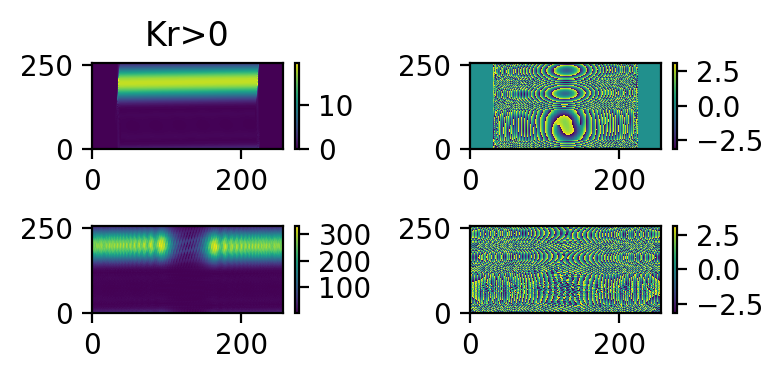

In [71]:
plt.figure(dpi=200,figsize=(4,2))
plt.subplot(2,2,1)
S_2d_p_rf = sf.fft(S_2d_p,axis=0) 
plt.pcolormesh(np.abs(S_2d_p_rf))
plt.title('Kr>0')
plt.colorbar()

plt.subplot(2,2,2)
plt.pcolormesh(np.angle(S_2d_p_rf))
plt.colorbar()

plt.subplot(2,2,3)
S_2df_p = sf.fft2(S_2d_p)
plt.pcolormesh(np.abs(S_2df_p))
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolormesh(np.angle(S_2df_p))
plt.colorbar()

plt.tight_layout()
plt.show()